In [ ]:
import pandas as pd
import numpy as np

In [92]:
from sklearn.cluster import KMeans

In [80]:
df = pd.read_csv('German Air Fares.csv')

In [81]:
df['price (€)'] =list(map(lambda x: x.replace(',', '.') if ',' in x else x, df['price (€)']))

In [82]:
df['price (€)']=df['price (€)'].astype('float')

In [83]:
df['arrival_city']=list(map(lambda x: x.lower().replace(' ',''), df['arrival_city'].astype('str')))

In [84]:
df['departure_city']=list(map(lambda x: x.lower().replace(' ',''), df['departure_city'].astype('str')))

In [85]:
df.groupby(['arrival_city', 'departure_city'])['price (€)'].std()

arrival_city     departure_city   
brebremen        frafrankfurt/main     66.050635
                 mucmünchen           101.207440
                 strstuttgart         125.088513
cgnköln/bonn     drsdresden           109.371614
                 hamhamburg           108.804658
                                         ...    
txlberlin-tegel  frafrankfurt/main     38.846067
                 mucmünchen            51.177235
                 nuenürnberg           64.184855
                 scnsaarbrücken       441.268490
                 strstuttgart         121.391769
Name: price (€), Length: 91, dtype: float64

In [86]:
df.groupby(['arrival_city', 'departure_city'])['price (€)'].median()

arrival_city     departure_city   
brebremen        frafrankfurt/main     202.0
                 mucmünchen            182.0
                 strstuttgart          236.0
cgnköln/bonn     drsdresden            320.0
                 hamhamburg            145.0
                                       ...  
txlberlin-tegel  frafrankfurt/main      61.0
                 mucmünchen             69.0
                 nuenürnberg           124.0
                 scnsaarbrücken       1047.0
                 strstuttgart          111.0
Name: price (€), Length: 91, dtype: float64

In [87]:
visited =[]

In [88]:
departing = []

In [79]:
df.departure_city.value_counts()

TXL Berlin-Tegel         13158
DUS Düsseldorf            6506
MUC München               6327
HAM Hamburg               5978
STR Stuttgart             4637
CGN Köln/Bonn             4471
NUE Nürnberg              3987
FRA Frankfurt/Main        3855
FDH Friedrichshafen       2651
DRS Dresden               2617
LEJ Leipzig/Halle         2275
HAJ Hannover              1543
BRE Bremen                1453
FKB Karlsruhe/Baden-B     1284
SCN Saarbrücken            793
FMO Münster/Osnabrück      638
DTM Dortmund               228
PAD Paderborn/Lippsta      165
RLG Rostock-Laage           60
Name: departure_city, dtype: int64

In [112]:
dff = pd.read_csv('Data/Cleaned_2018_Flights.csv')

In [4]:
dff.describe()

,Unnamed: 0,ItinID,MktID,MktCoupons,Quarter,OriginWac,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,PricePerTicket
count,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06
mean,4.767208e+06,1.759457e+11,1.759457e+13,1.018007e+00,2.557957e+00,5.466834e+01,5.462018e+01,1.201739e+03,1.944869e+00,2.410631e+00,2.324497e+02
std,2.752349e+06,6.349516e+10,6.349516e+12,1.330694e-01,1.112684e+00,2.801241e+01,2.805461e+01,6.971492e+02,2.282366e-01,2.879671e+00,1.433412e+02
min,0.000000e+00,2.018110e+10,2.018110e+12,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,5.000000e+01
25%,2.383604e+06,2.018135e+11,2.018135e+13,1.000000e+00,2.000000e+00,3.300000e+01,3.300000e+01,6.790000e+02,2.000000e+00,1.000000e+00,1.339100e+02
50%,4.767208e+06,2.018248e+11,2.018248e+13,1.000000e+00,3.000000e+00,4.400000e+01,4.400000e+01,1.028000e+03,2.000000e+00,1.000000e+00,1.971900e+02
75%,7.150812e+06,2.018352e+11,2.018352e+13,1.000000e+00,4.000000e+00,8.200000e+01,8.200000e+01,1.609000e+03,2.000000e+00,2.000000e+00,2.900000e+02
max,9.534416e+06,2.018454e+11,2.018454e+13,3.000000e+00,4.000000e+00,9.300000e+01,9.300000e+01,5.095000e+03,2.000000e+00,2.000000e+01,1.000000e+03


In [7]:
dff.head()

,Unnamed: 0,ItinID,MktID,MktCoupons,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket
0,0,20181767585,2018176758501,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,672.87
1,1,20181767586,2018176758601,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,367.68
2,2,20181767587,2018176758701,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,417.94
3,3,20181767636,2018176763601,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,247.10
4,4,20181767637,2018176763701,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,276.35


In [9]:
dff.Origin.value_counts()

LAX    415297
ATL    412245
DEN    372116
ORD    333387
SFO    308119
        ...  
RDM         1
COU         1
MMH         1
ERI         1
RKS         1
Name: Origin, Length: 263, dtype: int64

In [71]:
dff.shape

(9534417, 14)

In [12]:
dff.Miles.max()

5095.0

In [22]:
df[['arrival_city', 'departure_city']]

,arrival_city,departure_city
0,arrival_city,departure_city
1,arrival_city,departure_city
2,arrival_city,departure_city
3,arrival_city,departure_city
4,arrival_city,departure_city
...,...,...
62622,arrival_city,departure_city
62623,arrival_city,departure_city
62624,arrival_city,departure_city
62625,arrival_city,departure_city


In [50]:
dff.groupby(['Origin', 'Dest'])['PricePerTicket'].std()

Origin  Dest
ABE     ATL     105.843642
        FLL      47.274093
        MYR      26.950785
        ORD      57.471316
        PGD      49.680145
                   ...    
YAK     PHX     471.640223
        SEA     139.134748
        TUS            NaN
YNG     PIE      26.870058
        SFB      14.047538
Name: PricePerTicket, Length: 8471, dtype: float64

In [51]:
dff.groupby([ 'Dest', 'Origin'])['PricePerTicket'].std()

Dest  Origin
ABE   ATL       108.016269
      FLL        44.246708
      MYR        25.950391
      ORD       125.996825
      PGD        46.668853
                   ...    
YAK   PHX              NaN
      SEA       140.084227
      TUS              NaN
YNG   PIE        14.738999
      SFB        73.539105
Name: PricePerTicket, Length: 8471, dtype: float64

In [109]:
dff.isna().any()

Unnamed: 0           False
ItinID               False
MktID                False
MktCoupons           False
Quarter              False
Origin               False
OriginWac            False
Dest                 False
DestWac              False
Miles                False
ContiguousUSA        False
NumTicketsOrdered    False
AirlineCompany       False
PricePerTicket       False
dtype: bool

In [113]:
geo = pd.read_csv('Data/US_airports_geo.csv')

In [114]:
geo.isna().any()

IATA         False
AIRPORT      False
CITY          True
STATE         True
COUNTRY      False
LATITUDE     False
LONGITUDE    False
dtype: bool

### We going to need coordinates. Lets join a data set with geodata of the airports.

In [115]:
flights = pd.merge(geo, dff, how='inner', left_on='IATA', right_on='Origin')

In [116]:
flights.shape

(9418167, 21)

In [ ]:
flights.drop(['COUNTRY', 'Unnamed: 0', 'IATA','MktCoupons' ],axis=True, inplace=True)

In [120]:
flights.drop(['IATA' ],axis=True, inplace=True)

In [154]:
flights.head()

,AIRPORT,CITY,STATE,LATITUDE,LONGITUDE,ItinID,MktID,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket,departure
2898,Albuquerque International,Albuquerque,NM,35.040222,-106.609194,20181100617,2018110061701,1,ABQ,86,DFW,74,569.0,2,1.0,AA,109.0,2018-01-01 00:00:00
2899,Albuquerque International,Albuquerque,NM,35.040222,-106.609194,20181100618,2018110061801,1,ABQ,86,DFW,74,569.0,2,1.0,AA,118.0,2018-01-01 00:00:03
2900,Albuquerque International,Albuquerque,NM,35.040222,-106.609194,20181100619,2018110061901,1,ABQ,86,DFW,74,569.0,2,1.0,AA,122.0,2018-01-01 00:00:06
2901,Albuquerque International,Albuquerque,NM,35.040222,-106.609194,20181100620,2018110062001,1,ABQ,86,DFW,74,569.0,2,1.0,AA,127.0,2018-01-01 00:00:09
2902,Albuquerque International,Albuquerque,NM,35.040222,-106.609194,20181100621,2018110062101,1,ABQ,86,DFW,74,569.0,2,1.0,AA,137.0,2018-01-01 00:00:12


In [146]:
flights.sort_values('MktID',ascending=True, inplace = True)

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

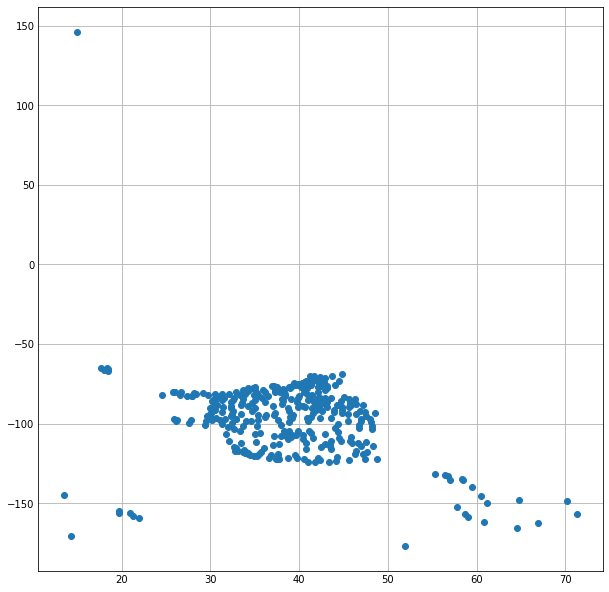

In [106]:
plt.style.use('_mpl-gallery')
x = geo.LATITUDE
y = geo.LONGITUDE


# plot
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x, y )

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### There is no depart - arrive time, so I need to ctreate it.

In [265]:
flights['departure'] = 0

#### Some flights are not round trips.

In [206]:
pd.unique(flights.Origin).size == pd.unique(flights.Dest).size

False

Need to find all the permutations of the airports.
    
Count the occurence of each of them and then spread them evenly through the year.
        
Group by FTW.

In [197]:
from itertools import chain

In [191]:
kgb=flights.groupby(['Origin', 'Dest'])['departure'].value_counts()

In [356]:
flights['departure'] = list(chain(*[pd.date_range(start='2020/01/01', end='2020/12/30', periods=i) for i in kgb]))

Try same with the same but group by aggregate...

In [363]:
flights['departure'] = flights['departure'].dt.floor('T')

In [3]:
plt.subplots(figsize=(5, 3))

g = flights[(flights['Origin']=='ABE') & (flights['Dest']=='MYR')]['departure']
sns.histplot(g, bins=12)

NameError: name 'plt' is not defined

In [2]:
g

NameError: name 'g' is not defined

In [270]:
kgb

Origin  Dest  departure
ABE     ATL   0            414
        FLL   0            321
        MYR   0            281
        ORD   0              5
        PGD   0            830
                          ... 
YAK     CDV   0              6
        JNU   0             99
        PHX   0              2
        SEA   0             96
        TUS   0              1
Name: departure, Length: 8192, dtype: int64

In [372]:
flights[(flights['Origin']=='ABE') & (flights['Dest']=='JNU')]['departure']

Series([], Name: departure, dtype: datetime64[ns])

## My one-liner time distribution fails miserably... Lets go a bit more secure way.

In [390]:
from math import floor, ceil

In [271]:
flights['departure']=0

In [ ]:
fl_part = flights.iloc[:200, :]
fl_part.sort_values(['Origin', 'Dest'], inplace=True)

In [600]:
fl_part.tail()

,AIRPORT,CITY,STATE,LATITUDE,LONGITUDE,ItinID,MktID,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket,departure
2260038,Dallas-Fort Worth International,Dallas-Fort Worth,TX,32.895951,-97.037200,20181100765,2018110076502,1,DFW,74,ABQ,86,569.0,2,1.0,AA,464.00,2018-12-20 06:00:00
2260039,Dallas-Fort Worth International,Dallas-Fort Worth,TX,32.895951,-97.037200,20181100774,2018110077404,1,DFW,74,ABQ,86,569.0,2,1.0,AA,192.14,2018-12-26 19:00:00
2260040,Dallas-Fort Worth International,Dallas-Fort Worth,TX,32.895951,-97.037200,20181101158,2018110115802,1,DFW,74,COS,82,592.0,2,1.0,AA,150.93,2018-01-01 00:00:00
2260041,Dallas-Fort Worth International,Dallas-Fort Worth,TX,32.895951,-97.037200,20181101159,2018110115902,1,DFW,74,COS,82,592.0,2,1.0,AA,202.43,2018-07-02 15:00:00
6407046,Palm Beach International,West Palm Beach,FL,26.683162,-80.095594,20181101132,2018110113204,1,PBI,33,ABQ,86,1671.0,2,1.0,AA,206.32,2018-01-01 00:00:00


In [597]:
for n_flights in old_val_counts:
    start = np.datetime64('2018-01-01')
    time = start
    period = ceil(8765/n_flights)
    for i in range(n_flights):
        deps.append(time)
        time = time + pd.Timedelta(hours=period)
        
        

In [570]:
grby = fl_part.groupby(['Origin', 'Dest'])['departure']

In [549]:
fl_part['departure'] = 0

/var/folders/gh/lf0mc7p936xfvjr53gs0s95m0000gn/T/ipykernel_1461/1895837502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_part['departure'] = 0


In [566]:
old_val_counts=grby.value_counts()
old_val_counts

Origin  Dest  departure
ABQ     DFW   0            141
DFW     ABQ   0             56
        COS   0              2
PBI     ABQ   0              1
Name: departure, dtype: int64

In [571]:
new_val_counts=grby.value_counts()


In [572]:
new_val_counts

Origin  Dest  departure          
ABQ     DFW   2018-01-03 15:00:00    1
              2018-01-06 06:00:00    1
              2018-01-08 21:00:00    1
              2018-01-11 12:00:00    1
              2018-01-14 03:00:00    1
                                    ..
DFW     ABQ   2018-12-26 19:00:00    1
              2019-01-02 08:00:00    1
        COS   2018-07-02 15:00:00    1
              2019-01-01 06:00:00    1
PBI     ABQ   2019-01-01 05:00:00    1
Name: departure, Length: 200, dtype: int64

<AxesSubplot:xlabel='departure', ylabel='Count'>

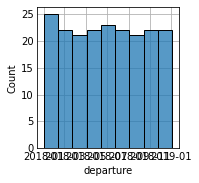

In [602]:
fig, ax = plt.subplots()
sns.histplot(fl_part['departure'])

In [596]:
deps = []

In [598]:
len(deps)

200

In [593]:
for j in range(1,4):
    print(j)
    start = np.datetime64('2018-01-01')
    time = start
    period = floor(8765/j)
    print(f'time = {time}', f'period = {period}')
    for i in range(j):
        time = time + pd.Timedelta(hours=period)
        print(time)
    #     print(pd.Timedelta(hours=period))


1
time = 2018-01-01 period = 8765
2019-01-01 05:00:00
2
time = 2018-01-01 period = 4382
2018-07-02 14:00:00
2019-01-01 04:00:00
3
time = 2018-01-01 period = 2921
2018-05-02 17:00:00
2018-09-01 10:00:00
2019-01-01 03:00:00


In [599]:
fl_part['departure']=deps

/var/folders/gh/lf0mc7p936xfvjr53gs0s95m0000gn/T/ipykernel_1461/4130340679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_part['departure']=deps


In [395]:
flights.shape

(9418167, 18)

In [487]:
i = 401
rng = pd.date_range('2018-01-01', periods=i, freq=f'{2*floor(8765/i)}T')

In [488]:
rng

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:42:00',
               '2018-01-01 01:24:00', '2018-01-01 02:06:00',
               '2018-01-01 02:48:00', '2018-01-01 03:30:00',
               '2018-01-01 04:12:00', '2018-01-01 04:54:00',
               '2018-01-01 05:36:00', '2018-01-01 06:18:00',
               ...
               '2018-01-12 09:42:00', '2018-01-12 10:24:00',
               '2018-01-12 11:06:00', '2018-01-12 11:48:00',
               '2018-01-12 12:30:00', '2018-01-12 13:12:00',
               '2018-01-12 13:54:00', '2018-01-12 14:36:00',
               '2018-01-12 15:18:00', '2018-01-12 16:00:00'],
              dtype='datetime64[ns]', length=401, freq='42T')

<AxesSubplot:ylabel='Count'>

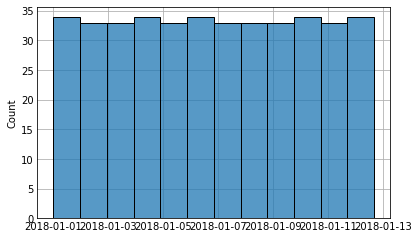

In [489]:
fig,ax = plt.subplots(figsize=(5,3))
sns.histplot(rng, bins=12)

In [286]:
flights['departure'] = flights['departure'].dt.floor('T')

AttributeError: Can only use .dt accessor with datetimelike values

In [412]:
l = list(range(1,11))
print(len(l))
l[:10]

10


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [1]:
flights['departure'] = deps

NameError: name 'deps' is not defined

In [276]:
rng

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:21:00',
               '2018-01-01 00:42:00', '2018-01-01 01:03:00',
               '2018-01-01 01:24:00', '2018-01-01 01:45:00',
               '2018-01-01 02:06:00', '2018-01-01 02:27:00',
               '2018-01-01 02:48:00', '2018-01-01 03:09:00',
               ...
               '2018-05-08 16:15:00', '2018-05-08 16:36:00',
               '2018-05-08 16:57:00', '2018-05-08 17:18:00',
               '2018-05-08 17:39:00', '2018-05-08 18:00:00',
               '2018-05-08 18:21:00', '2018-05-08 18:42:00',
               '2018-05-08 19:03:00', '2018-05-08 19:24:00'],
              dtype='datetime64[ns]', length=8765, freq='21T')

In [413]:
lm = [1, 2, 3, 4, 5, 6]
len(l) - len(lm)
ln = lm.extend(np.zeros(len(l) - len(lm)))
print(len(lm))
lm

10


[1, 2, 3, 4, 5, 6, 0.0, 0.0, 0.0, 0.0]

In [417]:
ls = [1, 2, 3, 4, 5, 6]
print(len(ls))
lfit = l[:len(ls)]
lfit[:6]

6


[1, 2, 3, 4, 5]

In [517]:
flights.sort_values(['Origin','Dest']).head()

,AIRPORT,CITY,STATE,LATITUDE,LONGITUDE,ItinID,MktID,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket,departure
8838370,Lehigh Valley International,Allentown,PA,40.652363,-75.440402,201811390083,20181139008301,1,ABE,23,ATL,34,692.0,2,1.0,DL,162.0,2020-08-18 08:58:00
8838371,Lehigh Valley International,Allentown,PA,40.652363,-75.440402,201811390084,20181139008401,1,ABE,23,ATL,34,692.0,2,1.0,DL,214.0,2020-08-18 12:27:00
8838372,Lehigh Valley International,Allentown,PA,40.652363,-75.440402,201811390085,20181139008501,1,ABE,23,ATL,34,692.0,2,1.0,DL,254.0,2020-08-18 15:55:00
8838373,Lehigh Valley International,Allentown,PA,40.652363,-75.440402,201811390086,20181139008601,1,ABE,23,ATL,34,692.0,2,1.0,DL,280.0,2020-08-18 19:23:00
8838374,Lehigh Valley International,Allentown,PA,40.652363,-75.440402,201811390087,20181139008701,1,ABE,23,ATL,34,692.0,2,1.0,DL,297.0,2020-08-18 22:51:00


In [351]:
g=pd.date_range(start='2020/01/01', end='2020/12/30', periods=401)

In [352]:
g

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 21:50:24',
               '2020-01-02 19:40:48', '2020-01-03 17:31:12',
               '2020-01-04 15:21:36', '2020-01-05 13:12:00',
               '2020-01-06 11:02:24', '2020-01-07 08:52:48',
               '2020-01-08 06:43:12', '2020-01-09 04:33:36',
               ...
               '2020-12-21 19:26:24', '2020-12-22 17:16:48',
               '2020-12-23 15:07:12', '2020-12-24 12:57:36',
               '2020-12-25 10:48:00', '2020-12-26 08:38:24',
               '2020-12-27 06:28:48', '2020-12-28 04:19:12',
               '2020-12-29 02:09:36', '2020-12-30 00:00:00'],
              dtype='datetime64[ns]', length=401, freq=None)

In [353]:
pd.infer_freq(g)

'78624S'

<AxesSubplot:xlabel='departure', ylabel='Count'>

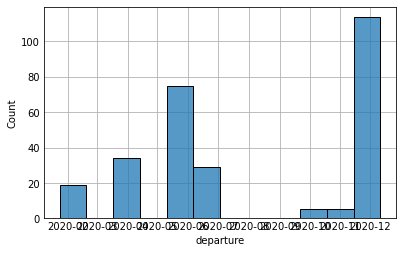

In [490]:
fig,ax = plt.subplots(figsize=(5,3))
sns.histplot(g, bins=12)

In [504]:
flights['departure'].iloc[0] + travel_time(600)

Timestamp('2020-01-01 01:00:00')

In [499]:
flights['departure'].iloc[0]

Timestamp('2020-01-01 00:00:00')

In [535]:
np.datetime64('2005-02-25')

numpy.datetime64('2005-02-25')

In [503]:
def travel_time(dist):
    return pd.Timedelta(minutes = dist/10)

In [534]:
pd.Timedelta('2020/01/01') + pd.Timedelta(minutes = 600)

ValueError: invalid unit abbreviation: /

In [522]:
fl_part['arrival'] = fl_part['departure']+fl_part['Miles'].apply(travel_time)

/var/folders/gh/lf0mc7p936xfvjr53gs0s95m0000gn/T/ipykernel_1461/2773808661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_part['arrival'] = fl_part['departure']+fl_part['Miles'].apply(travel_time)


In [523]:
fl_part

,AIRPORT,CITY,STATE,LATITUDE,LONGITUDE,ItinID,MktID,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket,departure,arrival
2898,Albuquerque International,Albuquerque,NM,35.040222,-106.609194,20181100617,2018110061701,1,ABQ,86,DFW,74,569.0,2,1.0,AA,109.00,2020-01-01 00:00:00,2020-01-01 00:56:54
2899,Albuquerque International,Albuquerque,NM,35.040222,-106.609194,20181100618,2018110061801,1,ABQ,86,DFW,74,569.0,2,1.0,AA,118.00,2020-01-01 21:09:00,2020-01-01 22:05:54
2900,Albuquerque International,Albuquerque,NM,35.040222,-106.609194,20181100619,2018110061901,1,ABQ,86,DFW,74,569.0,2,1.0,AA,122.00,2020-01-02 18:18:00,2020-01-02 19:14:54
2901,Albuquerque International,Albuquerque,NM,35.040222,-106.609194,20181100620,2018110062001,1,ABQ,86,DFW,74,569.0,2,1.0,AA,127.00,2020-01-03 15:27:00,2020-01-03 16:23:54
2902,Albuquerque International,Albuquerque,NM,35.040222,-106.609194,20181100621,2018110062101,1,ABQ,86,DFW,74,569.0,2,1.0,AA,137.00,2020-01-04 12:36:00,2020-01-04 13:32:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260038,Dallas-Fort Worth International,Dallas-Fort Worth,TX,32.895951,-97.037200,20181100765,2018110076502,1,DFW,74,ABQ,86,569.0,2,1.0,AA,464.00,2020-06-16 10:58:00,2020-06-16 11:54:54
2260039,Dallas-Fort Worth International,Dallas-Fort Worth,TX,32.895951,-97.037200,20181100774,2018110077404,1,DFW,74,ABQ,86,569.0,2,1.0,AA,192.14,2020-06-19 02:26:00,2020-06-19 03:22:54
2260040,Dallas-Fort Worth International,Dallas-Fort Worth,TX,32.895951,-97.037200,20181101158,2018110115802,1,DFW,74,COS,82,592.0,2,1.0,AA,150.93,2020-06-21 17:53:00,2020-06-21 18:52:12
2260041,Dallas-Fort Worth International,Dallas-Fort Worth,TX,32.895951,-97.037200,20181101159,2018110115902,1,DFW,74,COS,82,592.0,2,1.0,AA,202.43,2020-06-23 12:12:00,2020-06-23 13:11:12


In [519]:
tuple(fl_part['Miles'])

(569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
 569.0,
